In [2]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
data= pd.read_csv(r'C:\Users\Quaresma\Documents\IRONHACK\Labs\32 lab-feature-engineering\learningSet.txt')
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [4]:
#Lets deal with the aount of missing values
nulls_percent_df= data.isna().sum()
nulls_percent_df

# Put it into a dataframe 
nulls_percent_df=pd.DataFrame(data.isna().sum()/len(data))
nulls_percent_df

# Take it out of the index
nulls_percent_df=pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df

# Finally lets change column names 
nulls_percent_df.columns= ['columns_name', 'nulls_percentage']
nulls_percent_df

# Lets be super picky
nulls_percent_df.sort_values(by= ['nulls_percentage'], ascending= False)

,columns_name,nulls_percentage
414,RDATE_5,0.999906
436,RAMNT_5,0.999906
412,RDATE_3,0.997464
434,RAMNT_3,0.997464
413,RDATE_4,0.997055
...,...,...
168,ETHC3,0.000000
167,ETHC2,0.000000
166,ETHC1,0.000000
165,HHD12,0.000000


In [5]:
# First create the variable threshold
threshold  = 0.25

#define the condition 
condition= nulls_percent_df['nulls_percentage'] > threshold
columns_above_threshold= nulls_percent_df[condition]
columns_above_threshold

#Create a list with a column names
drop_list= list(columns_above_threshold['columns_name'])
drop_list.extend(['OSOURCE','ZIP'])
drop_list

['NUMCHLD',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_17',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24',
 'OSOURCE',
 'ZIP']

In [6]:
df = data.drop(drop_list,axis=1)
df

,ODATEDW,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,0,IL,,,3712,0,,,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,1,CA,,,5202,0,,,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,1,NC,,,0,0,,,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,0,CA,,,2801,0,,,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,0,FL,,,2001,0,X,X,,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,AK,,,0,0,,,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,1,TX,,,5001,0,,,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,1,MI,,,3801,0,,X,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,0,CA,,,4005,0,X,,,...,18.0,1,L,4,F,X,X,X,11.0,A


In [7]:
df['GENDER'].unique()

array(['F', 'M', ' ', 'C', 'U', 'J', 'A'], dtype=object)

In [8]:
df['GENDER'] = df['GENDER'].apply(lambda x: 'M' if x == 'M' else ('F' if x == 'F' else 'other'))
df['GENDER'].unique()

array(['F', 'M', 'other'], dtype=object)

In [9]:
#Check for null values in the numerical columns.
numerical= df.select_dtypes(include=np.number)
numerical.isna().sum()

numerical=pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
numerical.columns= ['columns_name', 'nulls_percentage']
numerical.sort_values(by= ['nulls_percentage'], ascending= False)

,columns_name,nulls_percentage
3,AGE,0.248030
4,INCOME,0.223096
310,ADATE_18,0.222855
309,ADATE_16,0.213432
308,ADATE_14,0.197742
...,...,...
111,HVP2,0.000000
110,HVP1,0.000000
109,ETHC6,0.000000
108,ETHC5,0.000000


0        NaN
1        9.0
2        1.0
3        4.0
4        2.0
        ... 
95407    NaN
95408    9.0
95409    NaN
95410    NaN
95411    8.0
Name: WEALTH1, Length: 95412, dtype: float64

In [34]:
#Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
data['GEOCODE2'].unique()
data['GEOCODE2']= data['GEOCODE2'].fillna(' ')
data['GEOCODE2'].replace(' ', 'A', inplace = True)
data['GEOCODE2'].value_counts()


A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [35]:
data['WEALTH1'].unique()
data['WEALTH1'].isna().sum()
print(data['WEALTH1'].isna().sum()/len(data['WEALTH1']))

#I should drop this column

0.4688299165723389


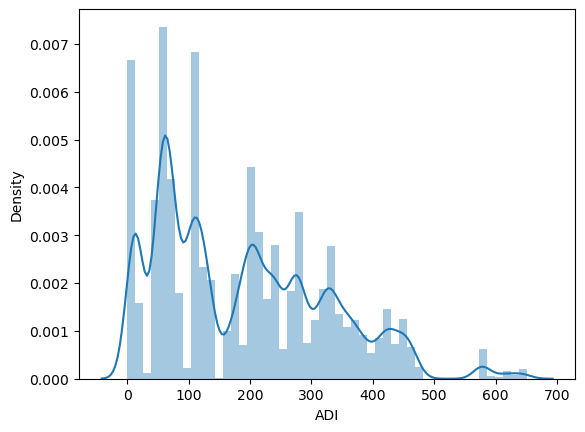

0.001383473776883411


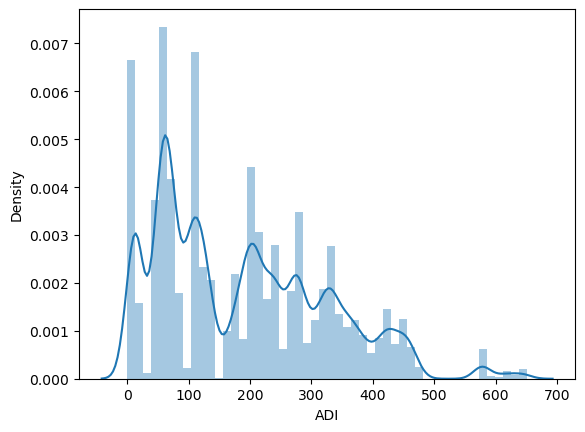

In [36]:
sns.distplot(data['ADI'])
plt.show()
print(data['ADI'].isna().sum()/len(data['ADI']))

data['ADI'].isna().sum() #migalhas 
data['ADI']= data['ADI'].fillna(np.mean(data['ADI']))

sns.distplot(data['ADI'])
plt.show()

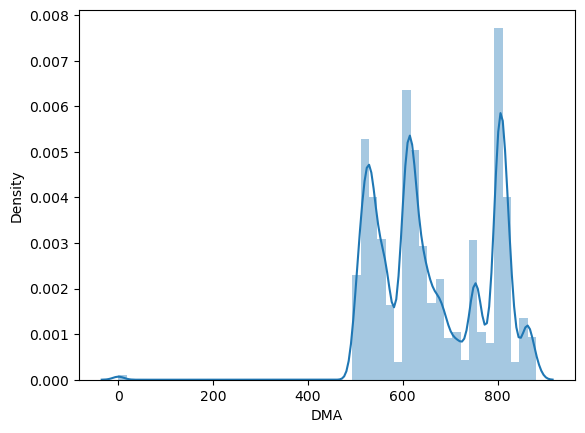

0.001383473776883411


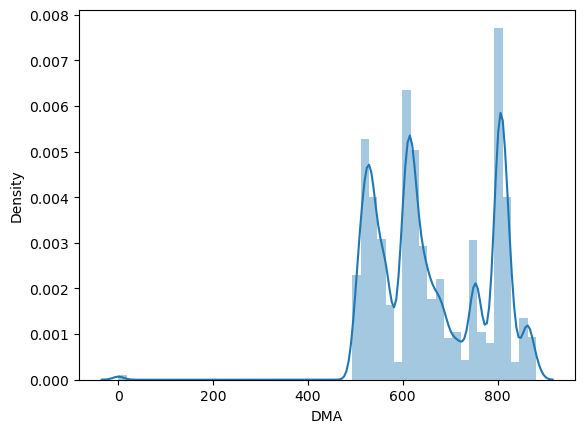

In [40]:
sns.distplot(data['DMA'])
plt.show()
print(data['DMA'].isna().sum()/len(data['DMA']))

data['DMA'].isna().sum() #migalhas 
data['DMA']= data['DMA'].fillna(np.mean(data['DMA']))

sns.distplot(data['DMA'])
plt.show()

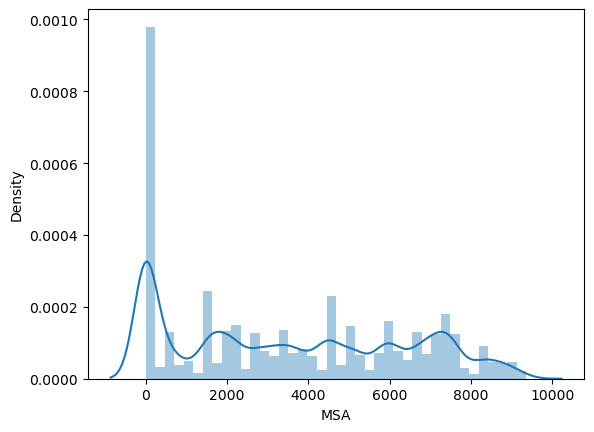

0.001383473776883411


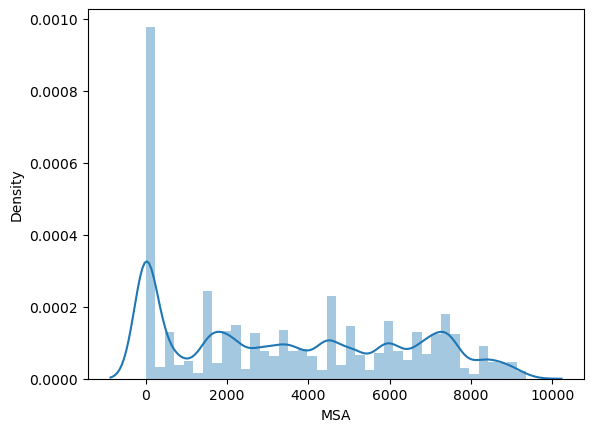

In [45]:
sns.distplot(data['MSA'])
plt.show()
print(data['MSA'].isna().sum()/len(data['MSA']))

data['MSA'].isna().sum() #migalhas 
data['MSA']= data['MSA'].fillna(np.mean(data['MSA']))

sns.distplot(data['MSA'])
plt.show()